In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

## Data Preprocessing

* The dataset we are going use contains 4000 images of cats and dogs, we will use 2000 images for training the model, 1000 images for validating the model, 1000 images for testing the model.

In [4]:
train_dir = '/media/shreyashkharat/Storage Drive/Machine Learning, Deep Learning/Python/Projects/Image Classification Model/Color Data/data/train'
validation_dir = '/media/shreyashkharat/Storage Drive/Machine Learning, Deep Learning/Python/Projects/Image Classification Model/Color Data/data/validation'
test_dir = '/media/shreyashkharat/Storage Drive/Machine Learning, Deep Learning/Python/Projects/Image Classification Model/Color Data/data/test'

Process for getting data from images:
* Read the picture files.
* Decode the JPEG into RGB grods of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values into [0,1] intervals.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

In [6]:
train_data_idg = idg(rescale = 1./255)
test_data_idg = idg(rescale = 1./255)
train_generator = train_data_idg.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
validation_generator = test_data_idg.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
# target_size is the resized size we want.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers
model_cnn.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 0.00001), metrics = ['acc'])

In [11]:
history = model_cnn.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50)

/home/shreyashkharat/.local/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 41s 410ms/step - loss: 0.6911 - acc: 0.5270 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 51s 514ms/step - loss: 0.6870 - acc: 0.5515 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 53s 534ms/step - loss: 0.6841 - acc: 0.5510 - val_loss: 0.6878 - val_acc: 0.5200
Epoch 4/30
100/100 [==============================] - 49s 491ms/step - loss: 0.6799 - acc: 0.6050 - val_loss: 0.6797 - val_acc: 0.5870
Epoch 5/30
100/100 [==============================] - 49s 488ms/step - loss: 0.6743 - acc: 0.6040 - val_loss: 0.6756 - val_acc: 0.6070
Epoch 6/30
100/100 [==============================] - 50s 501ms/step - loss: 0.6682 - acc: 0.6080 - val_loss: 0.6716 - val_acc: 0.6100
Epoch 7/30
100/100 [==============================] - 50s 499ms/step - loss: 0.6619 - acc: 0.6355 - val_loss: 0.6802 - val_acc: 0.5570
Epoch 8/30
100/100 [==============================] - 4

## Performance Evaluation

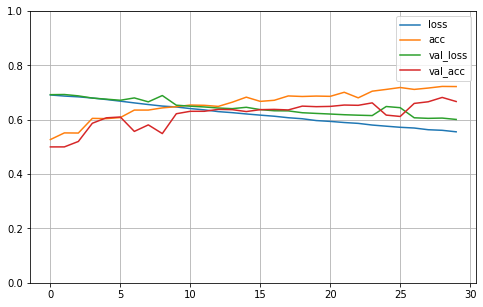

In [12]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

* The accuracy is upto 0.72

* The model has quite a lot computational time, so we will save the model.

In [19]:
model_cnn.save('Image_classifier_cnn.h5')